<h1>Introduction</h1>
As medicine student, recently i become interested in what specialization is most suitable for me. I've quite independet character so running small one persons clinic is something i'm gonna like. But it isn't suitable for all specializations, for example neural surgeons or ACUTE medicine specialist can't run one person bussines, becouse they work with severe patients in hospitals.

<strong> So i make a question: how popular are different doctors specialities in small one persons clinics? </strong>

And in this notebook i want to show you data driven approach to answer this question.

<h2 style="font-size: 20px;"> Data Collection </h2>

For our research we will get data from CEIDG (Central Evidency and Information about Enterprise) governmental site in my country (Poland).
We will download data for 2 PKD codes (that stands for <i>Polish Classification of Activities</i>):
-86.21.Z for general practitioners
-86.22.Z for specialzied practitioners

In [121]:
import pandas as pd
general_practitioners = pd.read_csv('general-practitioners.csv',sep=';')
specialized_practitioners = pd.read_csv('specialized-practitioners.csv',sep=';')

For our reasearch we will merge this two data_frames and later search them fro different specialization, becouse in some cases doctors with specialization can be registered in general practitioners and vice versa.


In [122]:
data = pd.concat([general_practitioners, specialized_practitioners])

In [123]:
data.shape

(94519, 9)

In [124]:
data.head()

,NazwaPodmiotu,Nip,Regon,KodPocztowy,Miejscowość,Ulica,NrBudynku,NrLokalu,DataRozpoczęciaDziałalności
0,Maciej Postolski PRAKTYKA LEKARSKA,1.130132e+09,11450677.0,NaN,Warszawa,NaN,NaN,NaN,1991-11-04
1,WOJCIECH GLINKOWSKI GABINET LEKARSKI,1.130344e+09,11420481.0,NaN,Warszawa,NaN,NaN,NaN,1991-07-17
2,"Lekarz medycyny, lekarz pediatra - Jerzy Stążka",1.130393e+09,16243084.0,NaN,Jadwisin,NaN,NaN,NaN,2000-02-02
3,Leksyka Jarosław Jóźwiak,1.130399e+09,384803460.0,NaN,NaN,NaN,NaN,NaN,2019-11-05
4,Praktyka lekarska Ewa Dąbrowska,1.130606e+09,12162348.0,NaN,Pruszków,NaN,NaN,NaN,2022-02-02


In [125]:
data.columns

Index(['NazwaPodmiotu', 'Nip', 'Regon', 'KodPocztowy', 'Miejscowość', 'Ulica',
       'NrBudynku', 'NrLokalu', 'DataRozpoczęciaDziałalności '],
      dtype='object')

<h2 style="font-size: 20px;"> Data Processing </h2>

What in data is in our interest?

'NazwaPodmiotu' -> Bussiness name, most useful for answering our question. <br> For most cases it's only Firstname and Lastname of owner but in some cases there is also name of medical speciality, and for that cases we are going to create new variable where we will place only speciality name.

Aditionaly we will keep this data:
'Miejscowośc' -> City
'DataRozpoczeciaDzialanosci' -> Bussiness starting date, on what we can calculate how long bussiness is running.

In [126]:
data = data[['NazwaPodmiotu','Miejscowość','DataRozpoczęciaDziałalności ']]

In [127]:
specialities = {'allergist':'allergo',
                'anesthetist':'anestezjo',
                'angiologist':'angio',
                'audiologist':'audio',
                'surgeon':'chiru',
                'pulmonologist':'pulmo',
                'internist':'intern',
                'infectiousDiseaseSpecialist':'zakaź',
                'dermatologist':'dermat',
                'diabetologist':'diabe',
                'endocrinologist':'endokry',
                'gastroenterologist':'gastro',
                'genetist':'genet',
                'geriatrician':'geria',
                'haemotologist':'hema',
                'immunologist':'immu',
                'kardgiologist':'kardio',
                'nuclear medicine specialist':'jądro',
                'occupational physician':'prac',
                'general practitioner':'rodzi',
                'sport medicine specialist':'sport',
                'nephrologist':'nefr',
                'neonatologist':'neonat',
                'neurologist':'neuro',
                'ophtalmologist':'okuli',
                'oncologist':'onkol',
                'orthopaedist':'ortope',
                'patomorphologhist':'patomor',
                'pediatrician':'pediat',
                'gynecologist':'ginek',
                'psychiatrist':'psych',
                'radiologist':'radiolo',
                'physical therapy specialist':'rehability',
                'reumatologist':'reuma',
                'urologist':'urol'
                }

In [128]:
#Creating new column 'RunningTime'
from datetime import date
current_year = date.today().year
current_year = [current_year for n in range(0,len(data))]

data['RunningTime'] = current_year - pd.DatetimeIndex(data=data['DataRozpoczęciaDziałalności ']).year

<strong> It must be noted that in our research we made assuption that there is equal unknown propability of inserting speciality name in business name for every speciality. </strong>

In [129]:
data['Speciality']=''
data.head()

,NazwaPodmiotu,Miejscowość,DataRozpoczęciaDziałalności,RunningTime,Speciality
0,Maciej Postolski PRAKTYKA LEKARSKA,Warszawa,1991-11-04,32,
1,WOJCIECH GLINKOWSKI GABINET LEKARSKI,Warszawa,1991-07-17,32,
2,"Lekarz medycyny, lekarz pediatra - Jerzy Stążka",Jadwisin,2000-02-02,23,
3,Leksyka Jarosław Jóźwiak,NaN,2019-11-05,4,
4,Praktyka lekarska Ewa Dąbrowska,Pruszków,2022-02-02,1,


In [130]:
for new, old in specialities.items():
    data.loc[lambda df: df['NazwaPodmiotu'].str.lower().str.contains(old), ['Speciality']] = new


In [131]:
data.shape

(94519, 5)

In [136]:
data.head()

,NazwaPodmiotu,Miejscowość,DataRozpoczęciaDziałalności,RunningTime,Speciality
0,Maciej Postolski PRAKTYKA LEKARSKA,Warszawa,1991-11-04,32,
1,WOJCIECH GLINKOWSKI GABINET LEKARSKI,Warszawa,1991-07-17,32,
2,"Lekarz medycyny, lekarz pediatra - Jerzy Stążka",Jadwisin,2000-02-02,23,pediatrician
3,Leksyka Jarosław Jóźwiak,NaN,2019-11-05,4,
4,Praktyka lekarska Ewa Dąbrowska,Pruszków,2022-02-02,1,


In [132]:
data_with_specialities = data.drop(data[data['Speciality']==''].index)

In [133]:
data_with_specialities.shape

(6941, 5)

In [137]:
data_with_specialities.head()

,NazwaPodmiotu,Miejscowość,DataRozpoczęciaDziałalności,RunningTime,Speciality
70,ELŻBIETA RADZIMOWSKA-RAU PRAKTYKA INTERNISTYCZNA,NaN,1995-03-01,28,internist
247,Specjalistyczna Przychodnia Lekarska Internist...,Izabelin C,1994-01-21,29,pediatrician
384,EWA MARCHEWA NIEPUBLICZNY ZAKŁAD OPIEKI ZDROWO...,Osuchów,2001-03-31,22,general practitioner
537,PSYCHIATRYCZNE WIZYTY DOMOWE WALCZAK SŁAWOMIR,Warszawa,2002-10-10,21,psychiatrist
553,"""GABINET INTERNISTYCZNY Ireneusz MIZERSKI",NaN,1999-05-12,24,internist


In [167]:
specialities_count = data_with_specialities.groupby(['Speciality'])['Speciality'].count().to_frame()
specialities_count.columns = ['Number']

In [193]:
specialities_count.sort_values(by=['Number'],inplace=True,ascending=False)

In [194]:
specialities_count

,Number
Speciality,
gynecologist,1016
ophtalmologist,789
urologist,710
pediatrician,595
surgeon,529
psychiatrist,503
dermatologist,379
general practitioner,379
orthopaedist,362


<h2 style="font-size: 20px;"> Data Visualisation </h2>

Yeay, we've got answer for our question!

Lets make beautiful bar plot using Seaborn to share knowledge with others.

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

[Text(0, 0, 'gynecologist'),
 Text(1, 0, 'ophtalmologist'),
 Text(2, 0, 'urologist'),
 Text(3, 0, 'pediatrician'),
 Text(4, 0, 'surgeon'),
 Text(5, 0, 'psychiatrist'),
 Text(6, 0, 'dermatologist'),
 Text(7, 0, 'general practitioner'),
 Text(8, 0, 'orthopaedist'),
 Text(9, 0, 'kardgiologist'),
 Text(10, 0, 'internist'),
 Text(11, 0, 'anesthetist'),
 Text(12, 0, 'occupational physician'),
 Text(13, 0, 'reumatologist'),
 Text(14, 0, 'oncologist'),
 Text(15, 0, 'radiologist'),
 Text(16, 0, 'endocrinologist'),
 Text(17, 0, 'neurologist'),
 Text(18, 0, 'gastroenterologist'),
 Text(19, 0, 'diabetologist'),
 Text(20, 0, 'patomorphologhist'),
 Text(21, 0, 'nephrologist'),
 Text(22, 0, 'pulmonologist'),
 Text(23, 0, 'sport medicine specialist'),
 Text(24, 0, 'haemotologist'),
 Text(25, 0, 'infectiousDiseaseSpecialist'),
 Text(26, 0, 'audiologist'),
 Text(27, 0, 'geriatrician'),
 Text(28, 0, 'genetist'),
 Text(29, 0, 'neonatologist'),
 Text(30, 0, 'angiologist'),
 Text(31, 0, 'allergist'),
 Text(

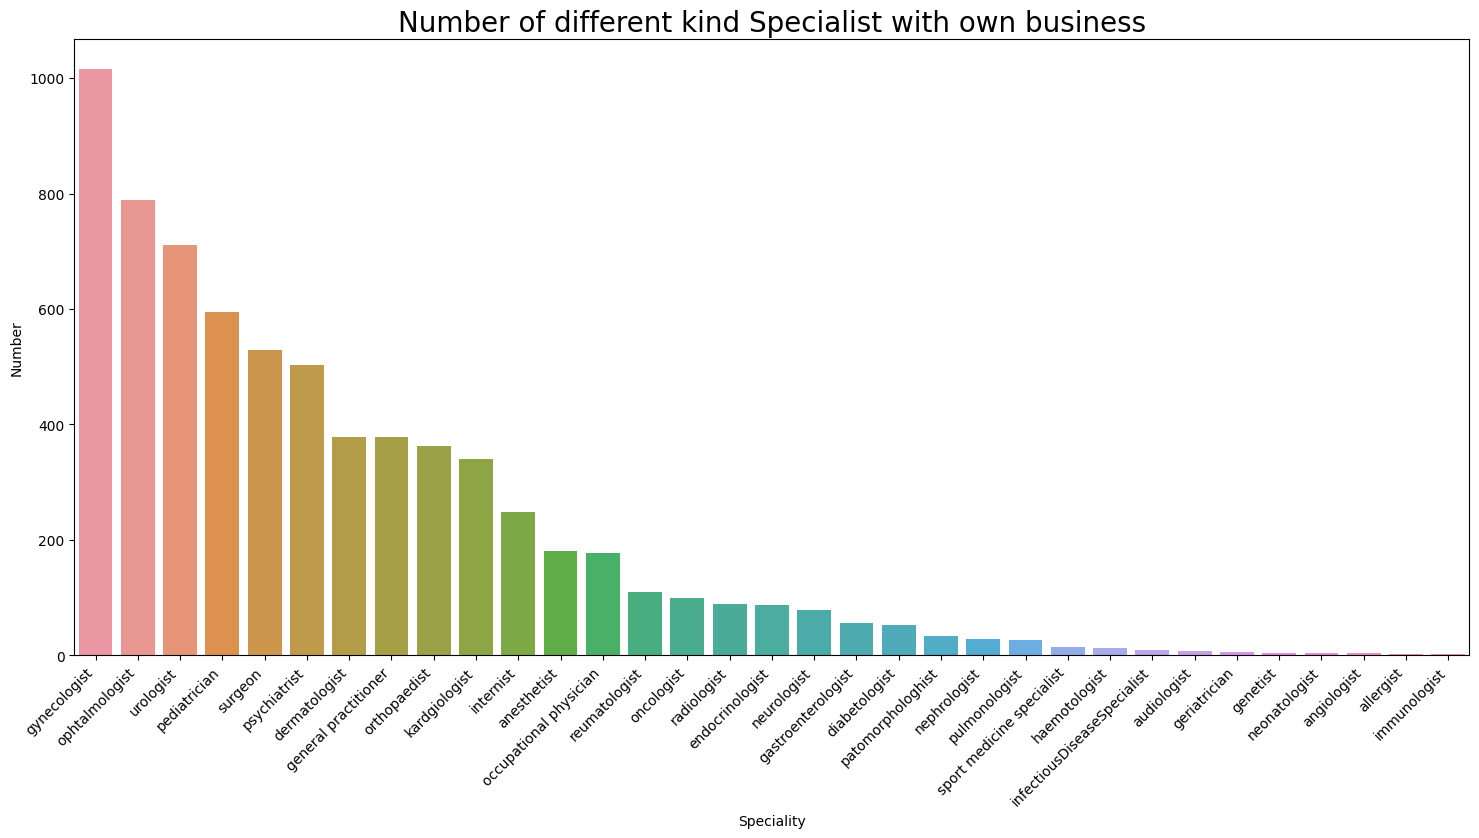

In [207]:
plt.figure(figsize=(18,8))
chart = sns.barplot(data=specialities_count, y='Number', x=specialities_count.index)
plt.title('Number of different kind Specialist with own business', fontsize=20)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

Thank you for reading and to the next time!